In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("/home/kyo/Pictures/2-24642_imagenes-random-png-cosas-random-png-transparent-png.jpg")
cv2.imshow("Image", img)
print(img.shape)
img_resized = cv2.resize(img, (640, 640), interpolation=cv2.INTER_NEAREST)
cv2.imshow("Resize", img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kyo/.local/lib/python3.10/site-packages/cv2/qt/plugins"


(320, 320, 3)


In [4]:
rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2.imshow("Rotate", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
height = img.shape[0]
width = img.shape[1]

center = (height/2, width/2)
scale = 1.0

#rotation matrix is to see how to to rotate the image based on center angle and scale as an image can be represented by a 2D matrix
M1 = cv2.getRotationMatrix2D(center, 45, scale)
img45 = cv2.warpAffine(img, M1, (height, width))

M2 = cv2.getRotationMatrix2D(center, 120, scale)
img120 = cv2.warpAffine(img, M2, (height, width))

M3 = cv2.getRotationMatrix2D(center, 150, scale)
img150 = cv2.warpAffine(img, M3, (height, width))

cv2.imshow("45", img45)

cv2.imshow("120", img120)

cv2.imshow("150", img150)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#canny edge detection
edge = cv2.Canny(img, 200, 300, True)
cv2.imshow("Edges", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
#smoother the image/blur
cv2.imshow("Image", img)
#
cv2.imshow("avg blur", cv2.blur(img, (10, 10)))
#using gausian filter
#cv2.imshow("gaus blur", cv2.GaussianBlur(img, (2, 2), cv2.BORDER_DEFAULT))
#bilateral filter only blurs pixels with similar intensities to central pixel
cv2.imshow("bil", cv2.bilateralFilter(img, 9, 75, 75))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#thresholding basically converting image to either black or white colour only
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 150

ret, threshold1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
ret, threshold2 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)
ret, threshold3 = cv2.threshold(img, threshold, 255, cv2.THRESH_TRUNC)
ret, threshold4 = cv2. threshold(img, threshold, 255, cv2.THRESH_TOZERO)
ret, threshold5 = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV)

cv2.imshow("Og", img)
cv2.imshow("bin", threshold1)
cv2.imshow("bin inverted", threshold2)
cv2.imshow(" bin truncated", threshold3)
cv2.imshow("bin to zero", threshold4)
cv2.imshow("zero inverted", threshold5)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#adaptive thresholding keeps changing threshold value for different parts of image so as to get better values
candle = cv2.imread("/home/kyo/Pictures/2-24642_imagenes-random-png-cosas-random-png-transparent-png.jpg")
cv2.imshow("Image", candle)
candle_b = cv2.cvtColor(candle, cv2.COLOR_BGR2GRAY)
ret, threshold1 = cv2.threshold(candle_b, 150, 255, cv2.THRESH_BINARY)
threshold2 = cv2.adaptiveThreshold(candle_b, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
threshold3 = cv2.adaptiveThreshold(candle_b, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow("bin thresh", threshold1)
cv2.imshow("adaptive thresh", threshold2)
cv2.imshow("adaptive gaussian", threshold3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#contour basically joins points having same intensity and forms a curve. this helps in finding objects
img = cv2.imread("/home/kyo/Pictures/2-24642_imagenes-random-png-cosas-random-png-transparent-png.jpg")
edges = cv2.Canny(img, 30, 200)
cv2.imshow("Image", img)
cv2.imshow("edge", edges)

contour, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contour, -1, (255, 0, 0), 3)
cv2.imshow("contour", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


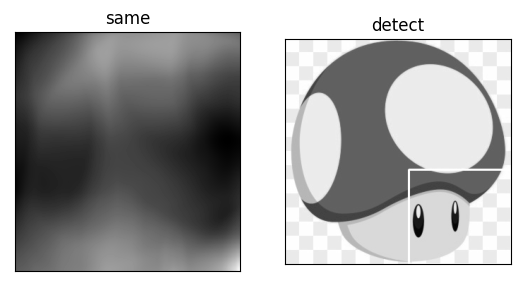

In [24]:
#matching template basically just finds the grayscaled image with the imput image
img = cv2.imread("/home/kyo/Pictures/2-24642_imagenes-random-png-cosas-random-png-transparent-png.jpg", 0)
logo = cv2.imread("/home/kyo/Pictures/img2.jpg", 0)
w, h = logo.shape[::-1]
res = cv2.matchTemplate(img, logo, eval('cv2.TM_CCOEFF'))
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, 255, 2)
plt.subplot(121)
plt.imshow(res, cmap='gray')
plt.title("same")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title("detect")
plt.xticks([])
plt.yticks([])
plt.show()